In [1]:
import pystac
import rioxarray

In [2]:
items = pystac.ItemCollection.from_file("search.json")

In [3]:
items

id: S2A_31UFU_20200328_0_L2A
"bbox: [4.814996623122647, 52.22257539160585, 6.141754296879459, 53.228577890548]"
created: 2022-11-06T06:14:59.218Z
platform: sentinel-2a
constellation: sentinel-2
instruments: ['msi']
eo:cloud_cover: 10.348317
proj:epsg: 32631
mgrs:utm_zone: 31
mgrs:latitude_band: U
mgrs:grid_square: FU


In [4]:
item = items[1]

In [5]:
item

id: S2B_31UFU_20200326_0_L2A
"bbox: [4.464995307918359, 52.22257539160585, 6.141754296879459, 53.240199174677954]"
created: 2022-11-06T06:06:31.438Z
platform: sentinel-2b
constellation: sentinel-2
instruments: ['msi']
eo:cloud_cover: 0.644109
proj:epsg: 32631
mgrs:utm_zone: 31
mgrs:latitude_band: U
mgrs:grid_square: FU


In [7]:
item.assets.keys()

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])

In [10]:
raster = rioxarray.open_rasterio(item.assets['visual'].href)

In [11]:
raster

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
[361681200 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [12]:
import geopandas as gpd

In [13]:
fields_cx = gpd.read_file("fields_cropped.shp")

In [16]:
raster.rio.crs

CRS.from_epsg(32631)

In [18]:
raster.rio.write_crs?

Signature:
raster.rio.write_crs(
    input_crs: Optional[Any] = None,
    grid_mapping_name: Optional[str] = None,
    inplace: bool = False,
) -> Union[xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray]
Docstring:
Write the CRS to the dataset in a CF compliant manner.

.. warning:: The grid_mapping attribute is written to the encoding.

Parameters
----------
input_crs: Any
    Anything accepted by `rasterio.crs.CRS.from_user_input`.
grid_mapping_name: str, optional
    Name of the grid_mapping coordinate to store the CRS information in.
    Default is the grid_mapping name of the dataset.
inplace: bool, optional
    If True, it will write to the existing dataset. Default is False.

Returns
-------
:obj:`xarray.Dataset` | :obj:`xarray.DataArray`:
    Modified dataset with CF compliant CRS information.

Examples
--------
Write the CRS of the current `xarray` object:

>>> raster.rio.write_crs("epsg:4326", inplace=True)

Write the CRS on a copy:

>>> raster = raster.rio.write_c

In [17]:
fields_cx.set_crs?

Signature: fields_cx.set_crs(crs=None, epsg=None, inplace=False, allow_override=False)
Docstring:
Set the Coordinate Reference System (CRS) of the ``GeoDataFrame``.

If there are multiple geometry columns within the GeoDataFrame, only
the CRS of the active geometry column is set.

NOTE: The underlying geometries are not transformed to this CRS. To
transform the geometries to a new CRS, use the ``to_crs`` method.

Parameters
----------
crs : pyproj.CRS, optional if `epsg` is specified
    The value can be anything accepted
    by :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
    such as an authority string (eg "EPSG:4326") or a WKT string.
epsg : int, optional if `crs` is specified
    EPSG code specifying the projection.
inplace : bool, default False
    If True, the CRS of the GeoDataFrame will be changed in place
    (while still returning the result) instead of making a copy of
    the GeoDataFrame.
allow_override : bool, default False
    If the the GeoData

In [19]:
fields_cx.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [20]:
fields_cx = fields_cx.to_crs(raster.rio.crs)

In [21]:
fields_cx.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
fields_cx.total_bounds

array([ 626758.92477826, 5801978.3252512 ,  642583.33625691,
       5817705.26052954])

In [ ]:
# raster.rio.clip_box(minx, miny, maxx, maxy)

In [25]:
raster.rio.clip_box?

Signature:
raster.rio.clip_box(
    minx: float,
    miny: float,
    maxx: float,
    maxy: float,
    auto_expand: Union[bool, int] = False,
    auto_expand_limit: int = 3,
    crs: Optional[Any] = None,
) -> xarray.core.dataarray.DataArray
Docstring:
Clip the :obj:`xarray.DataArray` by a bounding box.

.. versionadded:: 0.12 crs

Parameters
----------
minx: float
    Minimum bound for x coordinate.
miny: float
    Minimum bound for y coordinate.
maxx: float
    Maximum bound for x coordinate.
maxy: float
    Maximum bound for y coordinate.
auto_expand: Union[bool, int]
    If True, it will expand clip search if only 1D raster found with clip.
auto_expand_limit: int
    maximum number of times the clip will be retried before raising
    an exception.
crs: :obj:`rasterio.crs.CRS`, optional
    The CRS of the bounding box. Default is to assume it is the same
    as the dataset.

Returns
-------
xarray.DataArray:
    The clipped object.
File:      ~/miniconda3/envs/geospatial/lib/python

In [23]:
raster_clip_box = raster.rio.clip_box(*fields_cx.total_bounds)

In [24]:
raster_clip_box

<xarray.DataArray (band: 3, y: 1574, x: 1584)>
[7479648 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.268e+05 6.268e+05 ... 6.426e+05 6.426e+05
  * y            (y) float64 5.818e+06 5.818e+06 ... 5.802e+06 5.802e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          0

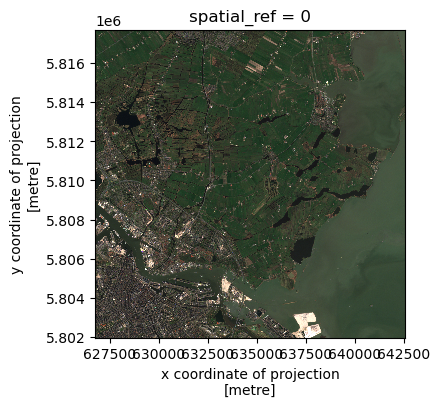

In [29]:
raster_clip_box.plot.imshow(figsize=(4,4))

In [32]:
raster_clip = raster_clip_box.rio.clip(fields_cx["geometry"])

In [31]:
fields_cx

,category,gewas,gewascode,jaar,status,geometry
0,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((626770.528 5817144.468, 626781.724 5..."
1,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((627741.956 5816647.845, 627706.773 5..."
2,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((628368.338 5816039.145, 628360.168 5..."
3,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((628531.328 5816773.509, 628530.147 5..."
4,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((628529.639 5816655.814, 628536.224 5..."
...,...,...,...,...,...,...
4867,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((640947.935 5810553.285, 640943.052 5..."
4868,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((640897.205 5810355.975, 640897.487 5..."
4869,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((640794.623 5810661.868, 640791.809 5..."
4870,Grasland,"Grasland, blijvend",265,2020,Definitief,"POLYGON ((642274.718 5813370.494, 642331.292 5..."


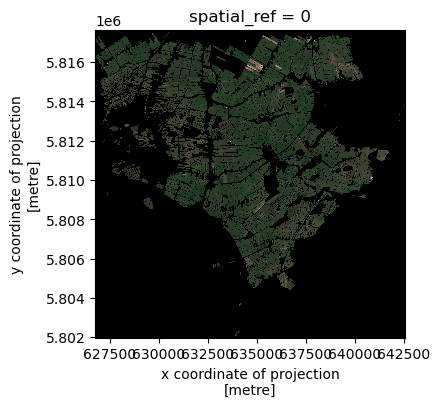

In [35]:
raster_clip.plot.imshow(figsize=(4,4))

In [37]:
raster_clip.rio.nodata

0

In [38]:
raster_clip

<xarray.DataArray (band: 3, y: 1567, x: 1582)>
array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 6.268e+05 6.268e+05 ... 6.426e+05 6.426e+05
  * y            (y) float64 5.818e+06 5.818e+06 ... 5.802e+06 5.802e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0
    _FillValue:          0

In [40]:
raster_clip_box.rio.clip?

Signature:
raster_clip_box.rio.clip(
    geometries: collections.abc.Iterable,
    crs: Optional[Any] = None,
    all_touched: bool = False,
    drop: bool = True,
    invert: bool = False,
    from_disk: bool = False,
) -> xarray.core.dataarray.DataArray
Docstring:
Crops a :obj:`xarray.DataArray` by geojson like geometry dicts.

Powered by `rasterio.features.geometry_mask`.

Examples:

    >>> geometry = ''' {"type": "Polygon",
    ...                 "coordinates": [
    ...                 [[-94.07955380199459, 41.69085871273774],
    ...                 [-94.06082436942204, 41.69103313774798],
    ...                 [-94.06063203899649, 41.67932439500822],
    ...                 [-94.07935807746362, 41.679150041277325],
    ...                 [-94.07955380199459, 41.69085871273774]]]}'''
    >>> cropping_geometries = [geojson.loads(geometry)]
    >>> xds = xarray.open_rasterio('cool_raster.tif')
    >>> cropped = xds.rio.clip(geometries=cropping_geometries, crs=4326)


.. versio